In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output 


In [2]:
dateparse = lambda x: datetime.strptime(x, '%Y')

dataset=pd.read_csv("Crime.csv", delimiter=";",header=0,low_memory=False,parse_dates=True,dayfirst=True)
dataset['Date']
if dataset['Date'].all() :
    dataset['Date'] = 2000 + dataset['Date']




dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y')
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year


dataset

,classe,Date,Code.département,Code.région,unité.de.compte,millPOP,millLOG,faits,POP,LOG,tauxpourmille,year
0,Coups et blessures volontaires,2016-01-01,01,84,victime,16,16,1437,638425,"308491,1600513844","2,25085170536868073",2016
1,Coups et blessures volontaires,2016-01-01,02,32,victime,16,16,1940,536136,"264180,0836046834","3,61848486204992748",2016
2,Coups et blessures volontaires,2016-01-01,03,84,victime,16,16,878,339384,"206980,3726684623","2,58704004903000717",2016
3,Coups et blessures volontaires,2016-01-01,04,93,victime,16,16,472,162565,"126760,4042559317","2,90345400301417911",2016
4,Coups et blessures volontaires,2016-01-01,05,93,victime,16,16,426,141107,"134646,6209596995","3,01898559249363974",2016
...,...,...,...,...,...,...,...,...,...,...,...,...
6661,Vols d'accessoires sur véhicules,2021-01-01,971,1,véhicule,19,19,372,384239,"231840,4543966618","0,96814742907409190",2021
6662,Vols d'accessoires sur véhicules,2021-01-01,972,2,véhicule,19,19,265,364508,"214787,6095071035","0,72700736335004990",2021
6663,Vols d'accessoires sur véhicules,2021-01-01,973,3,véhicule,19,19,117,281678,"94768,3687968868","0,41536790235659155",2021
6664,Vols d'accessoires sur véhicules,2021-01-01,974,4,véhicule,19,19,325,861210,"383878,0016751974","0,37737601746380095",2021


In [3]:
dataset = dataset.dropna(axis=1)
dataset

,classe,Date,Code.département,Code.région,unité.de.compte,millPOP,millLOG,faits,POP,LOG,tauxpourmille,year
0,Coups et blessures volontaires,2016-01-01,01,84,victime,16,16,1437,638425,"308491,1600513844","2,25085170536868073",2016
1,Coups et blessures volontaires,2016-01-01,02,32,victime,16,16,1940,536136,"264180,0836046834","3,61848486204992748",2016
2,Coups et blessures volontaires,2016-01-01,03,84,victime,16,16,878,339384,"206980,3726684623","2,58704004903000717",2016
3,Coups et blessures volontaires,2016-01-01,04,93,victime,16,16,472,162565,"126760,4042559317","2,90345400301417911",2016
4,Coups et blessures volontaires,2016-01-01,05,93,victime,16,16,426,141107,"134646,6209596995","3,01898559249363974",2016
...,...,...,...,...,...,...,...,...,...,...,...,...
6661,Vols d'accessoires sur véhicules,2021-01-01,971,1,véhicule,19,19,372,384239,"231840,4543966618","0,96814742907409190",2021
6662,Vols d'accessoires sur véhicules,2021-01-01,972,2,véhicule,19,19,265,364508,"214787,6095071035","0,72700736335004990",2021
6663,Vols d'accessoires sur véhicules,2021-01-01,973,3,véhicule,19,19,117,281678,"94768,3687968868","0,41536790235659155",2021
6664,Vols d'accessoires sur véhicules,2021-01-01,974,4,véhicule,19,19,325,861210,"383878,0016751974","0,37737601746380095",2021


<AxesSubplot:ylabel='classe'>

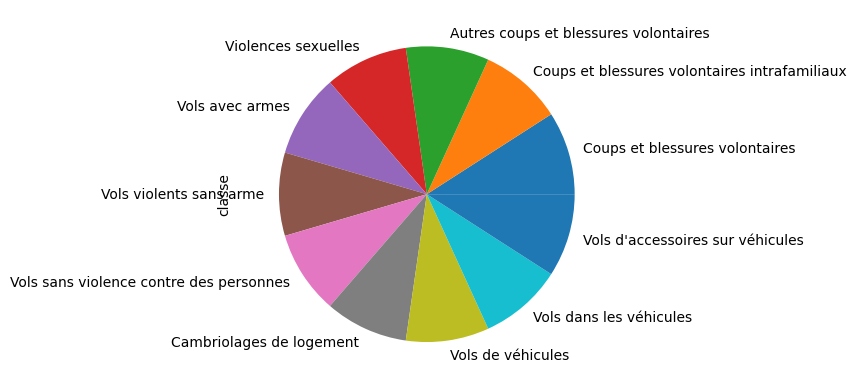

In [4]:
dataset["classe"]
classe_data = dataset["classe"]

ndf = dataset.groupby('classe').size()
ndf

# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
# explode = (0.1, 0, 0, 0, 0)  

# plt.pie(ndf, explode=explode, colors=colors,
# autopct='%1.1f%%', shadow=True, startangle=140)
# plt.title("Test")
# plt.show()

dataset["classe"].value_counts().plot(kind='pie')


In [5]:

# ndf = dataset.groupby(['Code.département',dataset['annee']]).sum()[["faits"]]
# print(ndf)

New_dataset = dataset[['classe','faits','year','unité.de.compte']]
New_dataset



,classe,faits,year,unité.de.compte
0,Coups et blessures volontaires,1437,2016,victime
1,Coups et blessures volontaires,1940,2016,victime
2,Coups et blessures volontaires,878,2016,victime
3,Coups et blessures volontaires,472,2016,victime
4,Coups et blessures volontaires,426,2016,victime
...,...,...,...,...
6661,Vols d'accessoires sur véhicules,372,2021,véhicule
6662,Vols d'accessoires sur véhicules,265,2021,véhicule
6663,Vols d'accessoires sur véhicules,117,2021,véhicule
6664,Vols d'accessoires sur véhicules,325,2021,véhicule


In [6]:


ndf = New_dataset.groupby(['year'])
Faits = ndf.sum('faits')
Faits = Faits.reset_index()

Faits

,year,faits
0,2016,2106236
1,2017,2113536
2,2018,2099166
3,2019,2158162
4,2020,1845158
5,2021,1959287


([<matplotlib.patches.Wedge at 0x2173800a9e0>,
 [Text(0.944174104549199, 0.5643892808148633, '2016'),
  Text(-0.05210164862842794, 1.0987654063585184, '2017'),
  Text(-0.9924862553836856, 0.47431111401112014, '2018'),
  Text(-0.8801974268514565, -0.6597366821422581, '2019'),
  Text(0.1059264077855826, -1.094887937705792, '2020'),
  Text(0.9647171318453444, -0.5285081413981175, '2021')],
 [Text(0.5150040570268357, 0.307848698626289, '17.1%'),
  Text(-0.028419081070051602, 0.5993265852864645, '17.2%'),
  Text(-0.5413561393001921, 0.2587151530969746, '17.1%'),
  Text(-0.48010768737352166, -0.3598563720775953, '17.6%'),
  Text(0.05777804061031777, -0.5972116023849775, '15.0%'),
  Text(0.526209344642915, -0.2882771680353368, '16.0%')])

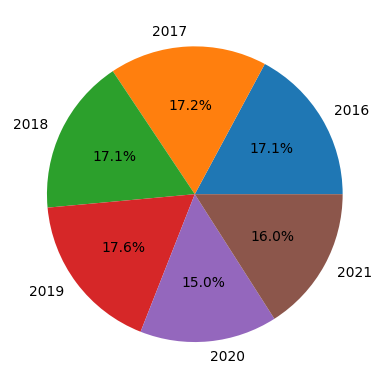

In [7]:
y=Faits['faits']
labels = Faits['year']
plt.pie(y,labels=labels , autopct='%1.1f%%')


In [8]:
dataset_by_classe = dataset[['classe','faits','unité.de.compte']]
dataset_by_classe

,classe,faits,unité.de.compte
0,Coups et blessures volontaires,1437,victime
1,Coups et blessures volontaires,1940,victime
2,Coups et blessures volontaires,878,victime
3,Coups et blessures volontaires,472,victime
4,Coups et blessures volontaires,426,victime
...,...,...,...
6661,Vols d'accessoires sur véhicules,372,véhicule
6662,Vols d'accessoires sur véhicules,265,véhicule
6663,Vols d'accessoires sur véhicules,117,véhicule
6664,Vols d'accessoires sur véhicules,325,véhicule


In [9]:

ndf_by_classe = dataset_by_classe.groupby(['classe'])
Top10 = ndf_by_classe.sum('faits')
Top10 = Top10.reset_index()

Top10

,classe,faits
0,Autres coups et blessures volontaires,832961
1,Cambriolages de logement,1359267
2,Coups et blessures volontaires,1563406
3,Coups et blessures volontaires intrafamiliaux,730445
4,Violences sexuelles,317032
5,Vols avec armes,56683
6,Vols d'accessoires sur véhicules,546102
7,Vols dans les véhicules,1534897
8,Vols de véhicules,852963
9,Vols sans violence contre des personnes,4008483


([<matplotlib.patches.Wedge at 0x21737e54ee0>,
 [Text(1.0751250573160258, 0.23260720352390782, 'Autres coups et blessures volontaires'),
  Text(0.7867579034470219, 0.7687730493218702, 'Cambriolages de logement'),
  Text(0.054258656989008634, 1.09866100237596, 'Coups et blessures volontaires'),
  Text(-0.5631098038462701, 0.9449377486439069, 'Coups et blessures volontaires intrafamiliaux'),
  Text(-0.7931869078347032, 0.7621381300260618, 'Violences sexuelles'),
  Text(-0.8623114476658558, 0.6829487295722985, 'Vols avec armes'),
  Text(-0.9569689001570598, 0.5424117662184215, "Vols d'accessoires sur véhicules"),
  Text(-1.099847280158547, -0.01832922060117446, 'Vols dans les véhicules'),
  Text(-0.8904649859632784, -0.6458112021120559, 'Vols de véhicules'),
  Text(0.32530779963292406, -1.0507972380521304, 'Vols sans violence contre des personnes'),
  Text(1.0917427036478564, -0.1345283205561907, 'Vols violents sans arme')],
 [Text(0.5864318494451048, 0.12687665646758609, '6.8%'),
  Text(

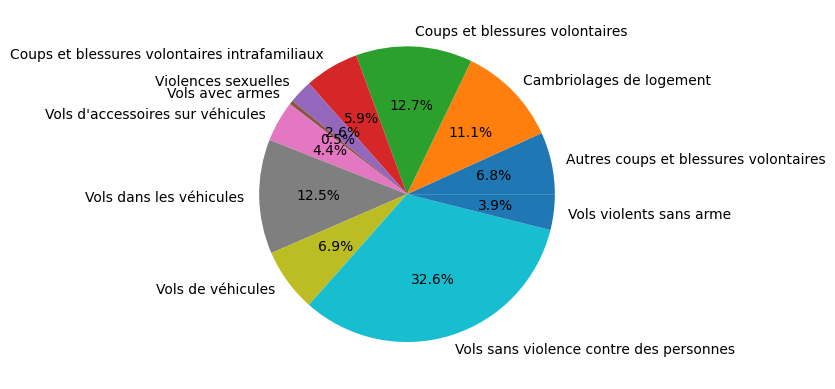

In [10]:
y=Top10['faits']
labels = Top10['classe']
plt.pie(y,labels=labels , autopct='%1.1f%%')

In [11]:
dataset_by_unite = dataset[['classe','faits','unité.de.compte']]

ndf_by_unite= dataset_by_unite.groupby(['unité.de.compte'])
unite = ndf_by_unite.sum('faits')
unite = unite.reset_index()

unite

,unité.de.compte,faits
0,infraction,1895256
1,victime,3443844
2,victime entendue,4008483
3,véhicule,2933962


([<matplotlib.patches.Wedge at 0x21737edca60>,
 [Text(0.9732437646859411, 0.5126368836710217, 'infraction'),
  Text(-0.3037124712658195, 1.0572410958705725, 'victime'),
  Text(-0.8983053104493063, -0.6348602753508645, 'victime entendue'),
  Text(0.8044819760831935, -0.7502058052009998, 'véhicule')],
 [Text(0.5308602352832406, 0.27962011836601175, '15.4%'),
  Text(-0.16566134796317425, 0.5766769613839485, '28.0%'),
  Text(-0.48998471479053063, -0.3462874229186534, '32.6%'),
  Text(0.4388083505908328, -0.40920316647327254, '23.9%')])

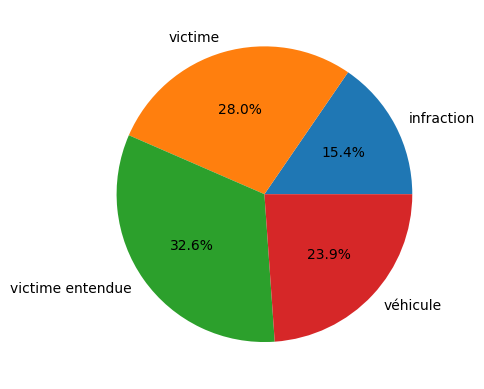

In [12]:
y=unite['faits']
labels = unite['unité.de.compte']
plt.pie(y,labels=labels , autopct='%1.1f%%')

<AxesSubplot:xlabel='unité.de.compte'>

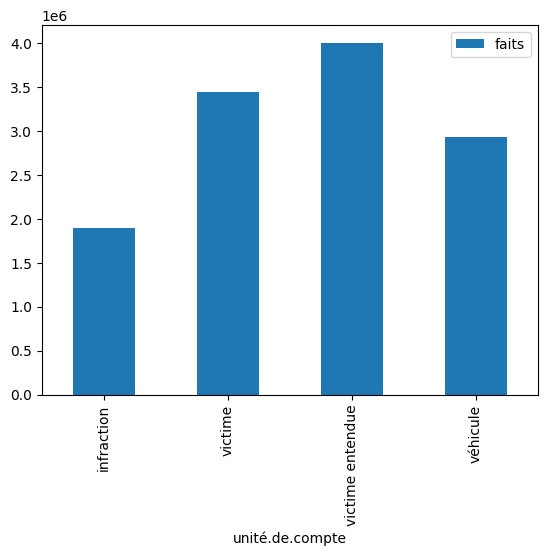

In [13]:
unite.plot.bar(x='unité.de.compte', y='faits')

In [45]:
datapop = dataset[['POP','faits','Code.département','year']]
# datapop = datapop.groupby(['Code.département'])
# datapop.sum(['POP','faits'])

datapop_departement = datapop.groupby(['Code.département'],as_index=False).count().head(5)




In [46]:
for i in datapop_departement['Code.département']:
    datapop_dep = datapop.loc[datapop['Code.département'] == i]
#     print(datapop_dep)
    datapop_dep2 = datapop_dep.groupby(['year','POP',"Code.département"],as_index=False)
    faits = datapop_dep2.sum(['faits'])
    faits

In [47]:
faits

,year,POP,Code.département,faits
0,2016,141107,05,3483
1,2017,141284,05,3316
2,2018,140698,05,3225
3,2019,141220,05,3007
4,2020,141220,05,2573
5,2021,141220,05,2718


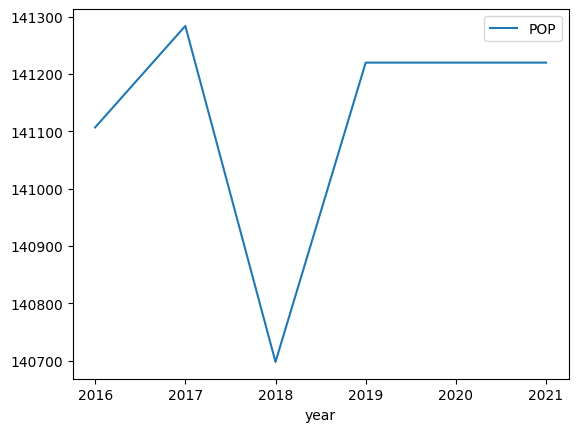

In [59]:
# faits.plot.line(x='year', y='faits')
faits.plot(x='year' , y='POP')
plt.rcParams['ytick.labelsize']=10


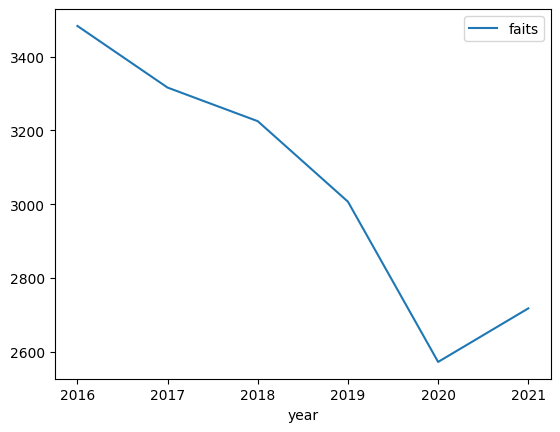

In [58]:
faits.plot(x='year' , y='faits')
plt.rcParams['ytick.labelsize']=10

In [ ]:
import plotly.express as px  # (version 4.7.0)
import plotly.graph_objects as go

fig = px.line(x=faits['year'], y=faits['faits'])
 figure = go.Figure(data=[
            go.Bar(name='Saturday', x=faits['year'], y=faits['faits']),
            go.Bar(name='Sunday', x=faits['year'], y=faits['faits'])
        ])
    
figure.show

In [ ]:
# # visit http://127.0.0.1:8050/ in your web browser.
# import pandas as pd
# import plotly.express as px  # (version 4.7.0)
# import plotly.graph_objects as go


# from dash.dependencies import Input, Output, State
# from dash.exceptions import PreventUpdate

# import dash  # (version 1.12.0) pip install dash


# app = dash.Dash(__name__)

# app.scripts.config.serve_locally = True
# app.css.config.serve_locally = True

# server = app.server

# years = faits['year'].unique()
# print(years)

# years_id = list(years)
# print(years_id)

# years_names_1 = [{'label': k, 'value': k } for k in sorted(years_id)]      
       
# app.layout = html.Div([

#     html.H1("Web Application Dashboards with Dash", style={'text-align': 'center'}),

#     dcc.Dropdown(id="year_select",
#                  options=years_names_1,
#                  optionHeight=25,
#                  multi=False,
#                  searchable=True,
#                  placeholder='Please select...',
#                  clearable=True,
#                  value='',
#                  style={'width': "40%"}
#                  ),


#     html.Div([
#         dcc.Graph(id="the_graph")
#     ]),

# ])

# # -----------------------------------------------------------
# # @app.callback(
# #     Output('the_graph', 'figure'),
# #     [Input('year_select', 'value')]
    
# # )


# # def update_graph(value):
  
# #     dff = faits[faits['faits'].isin(value)]  # filter all rows where capsule ID is the capsule ID selected
# #     scatterplot = px.scatter(
# #         data_frame=dff,
# #         x=dff["year"],
# #         y="faits",
# #         )

# #     scatterplot.update_traces(textposition='top center')

# #     return scatterplot

# @app.callback(dash.dependencies.Output('the_graph', 'figure'),
#              [dash.dependencies.Input('year_select', 'value')])
# def update_output(value):
    
#     if value != '':
#         print(faits['year'])
#         # extract the data for the selected borough
#         df_fig = faits[faits['year']==int(value)] 

#         # plot the data for the selected borough
#         figure = go.Figure(data=[
#             go.Bar(name='Saturday', x=df_fig['year'], y=df_fig['faits']),
#             go.Bar(name='Sunday', x=df_fig['year'], y=df_fig['faits'])
#         ])   
#     else:
#         return None


# # -----------------------------------------------------------

# if __name__ == "__main__":
#     app.run_server(port = 8051)
    